In [ ]:
# define TSP
import pandas as pd
import numpy as np

n_customer = 9
n_point = n_customer + 1
df = pd.DataFrame({
    "x": np.random.randint(0, 100, n_point),
    "y": np.random.randint(0, 100, n_point)
})

df.iloc[0]["x"] = 0
df.iloc[0]["y"] = 0
df

,x,y
0,0,0
1,9,21
2,66,53
3,93,53
4,24,13
5,4,22
6,81,0
7,99,70
8,78,18
9,65,28


In [ ]:
n_point

10

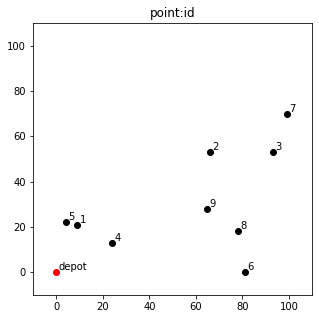

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))

for i, row in df.iterrows():
    if i==0:
        plt.scatter(row["x"], row["y"], c="r")
        plt.text(row["x"] + 1, row["y"] + 1, "depot")
    else:
        plt.scatter(row["x"], row["y"], c="black")
        plt.text(row["x"] + 1, row["y"] + 1, f"{i}")
plt.xlim([-10, 110])
plt.ylim([-10, 110])
plt.title("point:id")
plt.show()

In [ ]:
!pip install -U pulp

     |████████████████████████████████| 14.2 MB 3.7 MB/s 


In [ ]:
def distances(n1, n2):
  return np.linalg.norm(df.iloc[n1]-df.iloc[n2])

distances(1, 2)

65.36818798161687

In [ ]:
import pulp
# set problem
problem = pulp.LpProblem("tsp_mip", pulp.LpMinimize)

# set valiable
x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary')
# トラックする必要あり
u = pulp.LpVariable.dicts('u', (i for i in range(n_point)), lowBound=1, upBound=n_point, cat='Integer')

print(x)
print("\n")
print(u)

{(0, 0): x_(0,_0), (0, 1): x_(0,_1), (0, 2): x_(0,_2), (0, 3): x_(0,_3), (0, 4): x_(0,_4), (0, 5): x_(0,_5), (0, 6): x_(0,_6), (0, 7): x_(0,_7), (0, 8): x_(0,_8), (0, 9): x_(0,_9), (1, 0): x_(1,_0), (1, 1): x_(1,_1), (1, 2): x_(1,_2), (1, 3): x_(1,_3), (1, 4): x_(1,_4), (1, 5): x_(1,_5), (1, 6): x_(1,_6), (1, 7): x_(1,_7), (1, 8): x_(1,_8), (1, 9): x_(1,_9), (2, 0): x_(2,_0), (2, 1): x_(2,_1), (2, 2): x_(2,_2), (2, 3): x_(2,_3), (2, 4): x_(2,_4), (2, 5): x_(2,_5), (2, 6): x_(2,_6), (2, 7): x_(2,_7), (2, 8): x_(2,_8), (2, 9): x_(2,_9), (3, 0): x_(3,_0), (3, 1): x_(3,_1), (3, 2): x_(3,_2), (3, 3): x_(3,_3), (3, 4): x_(3,_4), (3, 5): x_(3,_5), (3, 6): x_(3,_6), (3, 7): x_(3,_7), (3, 8): x_(3,_8), (3, 9): x_(3,_9), (4, 0): x_(4,_0), (4, 1): x_(4,_1), (4, 2): x_(4,_2), (4, 3): x_(4,_3), (4, 4): x_(4,_4), (4, 5): x_(4,_5), (4, 6): x_(4,_6), (4, 7): x_(4,_7), (4, 8): x_(4,_8), (4, 9): x_(4,_9), (5, 0): x_(5,_0), (5, 1): x_(5,_1), (5, 2): x_(5,_2), (5, 3): x_(5,_3), (5, 4): x_(5,_4), (5, 5): x

In [ ]:
# set objective function
problem += pulp.lpSum(distances(i, j) * x[i, j] for i in range(n_point) for j in range(n_point))

In [ ]:
# 制約を設ける
for i in range(n_point):
  problem += x[i, i] == 0

for i in range(n_point):
    problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 1
    problem += pulp.lpSum(x[j, i] for j in range(n_point)) == 1

# solve problem
status = problem.solve()

# output status, value of objective function
status, pulp.LpStatus[status], pulp.value(problem.objective)

(1, 'Optimal', 187.37948723222672)

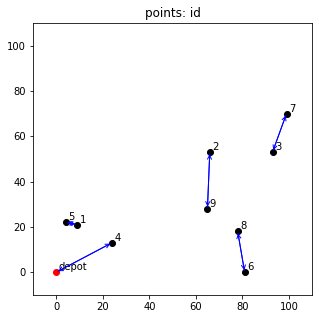

In [ ]:
# check TSP problem and optimized route
plt.figure(figsize=(5, 5))

# draw problem state
for i, row in df.iterrows():
    if i == 0:
        plt.scatter(row['x'], row['y'], c='r')
        plt.text(row['x'] + 1, row['y'] + 1, 'depot')
    else:
        plt.scatter(row['x'], row['y'], c='black')
        plt.text(row['x'] + 1, row['y'] + 1, f'{i}')

plt.xlim([-10, 110])
plt.ylim([-10, 110])
plt.title('points: id')

# draw optimal route
routes = [(i, j) for i in range(n_point) for j in range(n_point) if pulp.value(x[i, j]) == 1]
arrowprops = dict(arrowstyle='->', connectionstyle='arc3', edgecolor='blue')
for i, j in routes:
    plt.annotate('', xy=[df.iloc[j]['x'], df.iloc[j]['y']], xytext=[df.iloc[i]['x'], df.iloc[i]['y']], arrowprops=arrowprops)
plt.show()

In [ ]:
# 制約を設ける
for i in range(n_point):
  problem += x[i, i] == 0

for i in range(n_point):
    problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 1
    problem += pulp.lpSum(x[j, i] for j in range(n_point)) == 1

# eliminate subtour
for i in range(n_point):
    for j in range(n_point):
        if i != j and (i != 0 and j != 0):
            problem += u[i] - u[j] <= n_point * (1 - x[i, j]) - 1
            
# solve problem
status = problem.solve()

# output status, value of objective function
status, pulp.LpStatus[status], pulp.value(problem.objective)

(1, 'Optimal', 305.6137830849458)

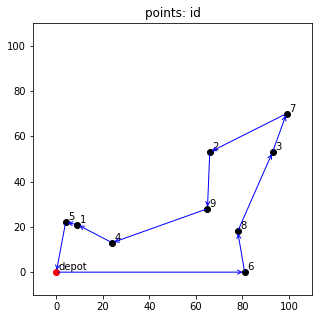

In [ ]:
# check TSP problem and optimized route
plt.figure(figsize=(5, 5))

# draw problem state
for i, row in df.iterrows():
    if i == 0:
        plt.scatter(row['x'], row['y'], c='r')
        plt.text(row['x'] + 1, row['y'] + 1, 'depot')
    else:
        plt.scatter(row['x'], row['y'], c='black')
        plt.text(row['x'] + 1, row['y'] + 1, f'{i}')

plt.xlim([-10, 110])
plt.ylim([-10, 110])
plt.title('points: id')

# draw optimal route
routes = [(i, j) for i in range(n_point) for j in range(n_point) if pulp.value(x[i, j]) == 1]
arrowprops = dict(arrowstyle='->', connectionstyle='arc3', edgecolor='blue')
for i, j in routes:
    plt.annotate('', xy=[df.iloc[j]['x'], df.iloc[j]['y']], xytext=[df.iloc[i]['x'], df.iloc[i]['y']], arrowprops=arrowprops)
plt.show()